<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout12_MLR_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #12 : Multiple Linear Regression - Part B (Added Variable Plots) 

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Grandfather Clocks

Consider the following data from an auction site regarding the price of grandfather clocks.   Most grandfather clocks are considered to be antiques.  The goal is to understand the auction price as a function of Age and Number of Bidders.
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li>Response Variable: Price ($)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Age: Age of grandfather clock</li>
          <li>Number of Bidders</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=1wI9yLroxTYfky6Weymd5_aO-hOJiMO_F" width="25%" height="25%"></img></p>
      
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>




## Load tidyverse

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [1]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()





---




## Load the data

In [2]:
# Reading data in using read_csv 
 GrandfatherClocks <- read_csv("http://www.StatsClass.org/stat360/Datasets/Grandfather_Clocks.csv")

Rows: 32 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Price, Age, Number_Bidders


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Taking a quick look at the data...

In [3]:
head(GrandfatherClocks)

Price,Age,Number_Bidders
<dbl>,<dbl>,<dbl>
1235,127,13
1080,115,12
845,127,7
1522,150,9
1047,156,6
1979,182,11


## Model: $Price \sim Age + Number Bidders$

In [5]:
Model_Age_and_NumberBidders <- lm(Price ~ Age + Number_Bidders, data=GrandfatherClocks)
summary(Model_Age_and_NumberBidders)


Call:
lm(formula = Price ~ Age + Number_Bidders, data = GrandfatherClocks)

Residuals:
   Min     1Q Median     3Q    Max 
-207.2 -117.8   16.5  102.7  213.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1336.7221   173.3561  -7.711 1.67e-08 ***
Age               12.7362     0.9024  14.114 1.60e-14 ***
Number_Bidders    85.8151     8.7058   9.857 9.14e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 133.1 on 29 degrees of freedom
Multiple R-squared:  0.8927,	Adjusted R-squared:  0.8853 
F-statistic: 120.7 on 2 and 29 DF,  p-value: 8.769e-15




---



---



## Correlation Matrix

In [7]:
cor(GrandfatherClocks)

,Price,Age,Number_Bidders
Price,1.0000000,0.7302332,0.3946404
Age,0.7302332,1.0000000,-0.2537491
Number_Bidders,0.3946404,-0.2537491,1.0000000


## Partial Correlation Matrix

A partial correlation matrix can be obtained using the pcor() function from the <strong>ppcor</strong> library in R.

In [8]:
#Get the ppcor package
install.packages("ppcor")

#Load the ppcor library
library(ppcor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




The partial correlation matrix can be obtained using the <strong>pcor()</strong> function from the ppcor library.

In [14]:
ppcor::pcor(GrandfatherClocks)

,Price,Age,Number_Bidders
Price,1.0000000,0.9343026,0.8775786
Age,0.9343026,1.0000000,-0.8632919
Number_Bidders,0.8775786,-0.8632919,1.0000000
,Price,Age,Number_Bidders
Price,0.000000e+00,1.597896e-14,9.135309e-11
Age,1.597896e-14,0.000000e+00,4.113950e-10
Number_Bidders,9.135309e-11,4.113950e-10,0.000000e+00
,Price,Age,Number_Bidders
Price,0.000000,14.11400,9.857286
Age,14.114001,0.00000,-9.211260


## Added Variable Plots

An added variable plot for $Age$ can be constructed by obtaining the following two sets of residuals and plotting them against each other.


1.   (Y-axis) Residuals from $Price \sim Number \, of \,Bidders$
2.   (X-axis) Residuals from $Age \sim Number \, of \,Bidders$



The partial correlation squared is 0.9343^2 = 0.8729

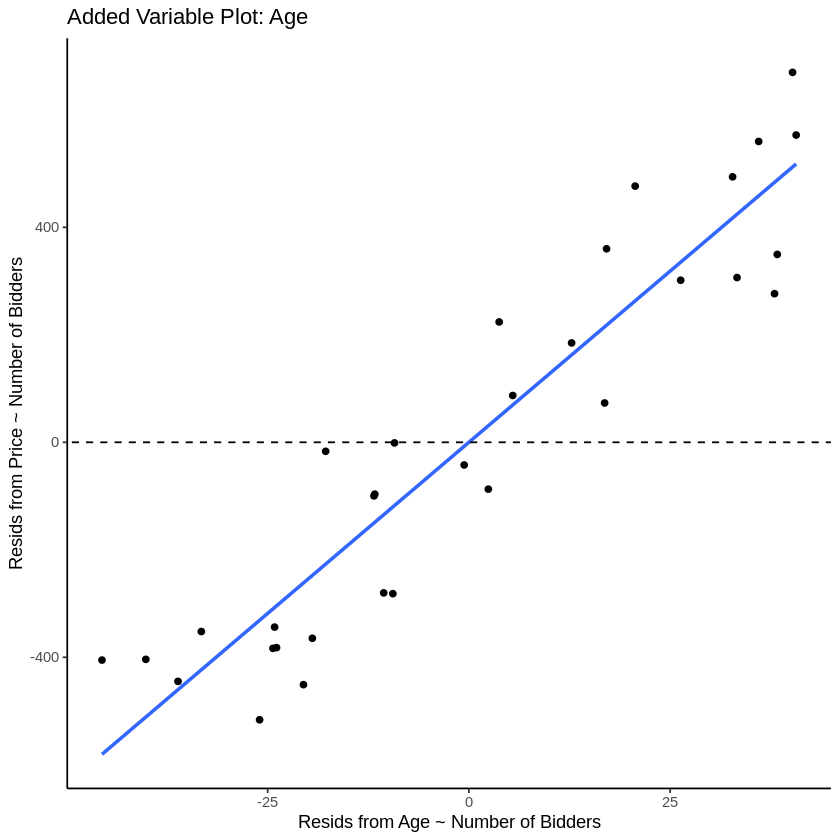

In [56]:
#Getting an added variable plot for Age

#Getting the values for the y-axis
Resid_Price_vs_NumberBidders <- lm(Price ~ Number_Bidders, data=GrandfatherClocks)$residuals

#Getting the values for the x-axis
Resid_Age_vs_NumberBidders <- lm(Age ~ Number_Bidders, data=GrandfatherClocks)$residuals

ggplot(data=data.frame(Resid_Age_vs_NumberBidders, Resid_Price_vs_NumberBidders), aes(x=Resid_Age_vs_NumberBidders, y=Resid_Price_vs_NumberBidders)) + 
  geom_point() + 
  geom_smooth(formula = y~x, method='lm', se=FALSE) +
  geom_abline(intercept=0,slope=0, linetype="dashed") +
  labs(y="Resids from Price ~ Number of Bidders", x = "Resids from Age ~ Number of Bidders") + 
  ggtitle("Added Variable Plot: Age") + 
  theme_classic()

  #Partial Correlation Squared
  cat("The partial correlation squared is 0.9343^2 = 0.8729")

Likewise, an added variable plot for  $Number\, of \, Bidders$  can be constructed by obtaining the following two sets of residuals.

(Y-axis) Residuals from  Price∼Age 
(X-axis) Residuals from  NumberofBidders∼Age

The partial correlation squared is 0.8776^2 = 0.7701

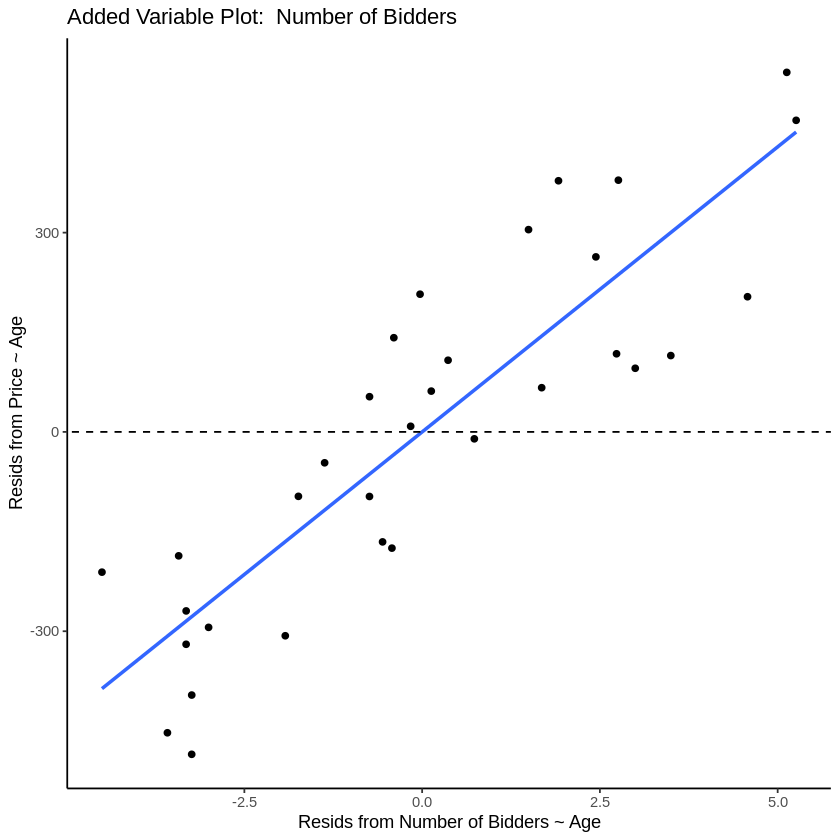

In [59]:
#Getting an added variable plot for the Number of Bidders

#Getting the values for the y-axis
Resid_Price_vs_Age <- lm(Price ~ Age, data=GrandfatherClocks)$residuals

#Getting the values for the x-axis
Resid_NumberBidders_vs_Age <- lm(Number_Bidders ~ Age, data=GrandfatherClocks)$residuals

ggplot(data=data.frame(Resid_Price_vs_Age, Resid_NumberBidders_vs_Age), aes(x=Resid_NumberBidders_vs_Age, y=Resid_Price_vs_Age)) + 
  geom_point() + 
  geom_smooth(formula = y~x, method='lm', se=FALSE) +
  geom_abline(intercept=0,slope=0, linetype="dashed") +
  labs(y="Resids from Price ~ Age", x = "Resids from Number of Bidders ~ Age") + 
  ggtitle("Added Variable Plot:  Number of Bidders") + 
  theme_classic()

  #Partial Correlation Squared
  cat("The partial correlation squared is 0.8776^2 = 0.7701")

## Added Variable Plots via car package

The <strong>car</strong> package in R can be used to obtain the desired added variable plots. 

In [16]:
#Install car package and load library
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘matrixStats’, ‘caret’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




The **avPlots()** function from the car package can be used to obtain the added variable plots for our model.

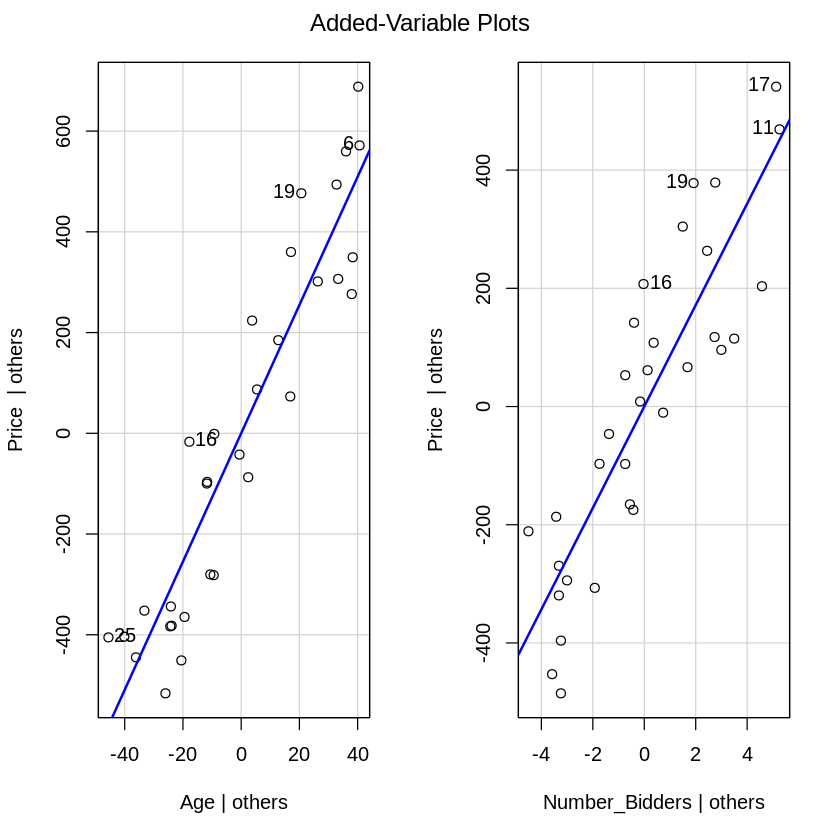

In [60]:
avPlots(Model_Age_and_NumberBidders)

End of Document